## Part 1 ‑ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and visualize and describe the resulting time series of login counts in ways 
that best characterize the underlying patterns of the demand. Please report/illustrate 
important features of the demand, such as daily cycles. If there are data quality issues, 
please report them.

<b>As shown in the plots below, the login cycle peaks on the weekends and twice a day at 
midnight and noon. (There were several NAN values which were replaced with 0's.)</b>

In [3]:
import numpy as np
from numpy.random import randn
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sb

import json
#from pandas.io.json import json_normalize
from collections import defaultdict

In [4]:
%matplotlib inline
rcParams['figure.figsize'] = 10, 8
sb.set_style('whitegrid')

In [5]:
logs_df = pd.read_json('logins.json')

In [6]:
logs_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [7]:
logs_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [8]:
logs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [11]:
logs_df.set_index('login_time', inplace = True)

In [12]:
logs_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [13]:
logs_df['count'] = 1

In [14]:
logs_df.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [15]:
agg_df = logs_df.resample('15T').sum()

In [16]:
agg_df.head()

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0


In [17]:
agg_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9381 non-null float64
dtypes: float64(1)
memory usage: 152.9 KB


In [18]:
agg_df.isnull().sum()

count    407
dtype: int64

In [19]:
agg_df[agg_df.isnull()] = 0.0

In [20]:
agg_df.isnull().sum()

count    0
dtype: int64

In [24]:
agg_df.head(10)

,count
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


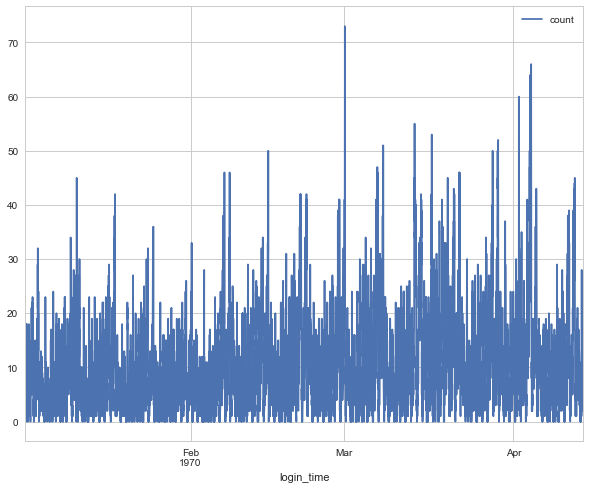

In [21]:
agg_df.plot()

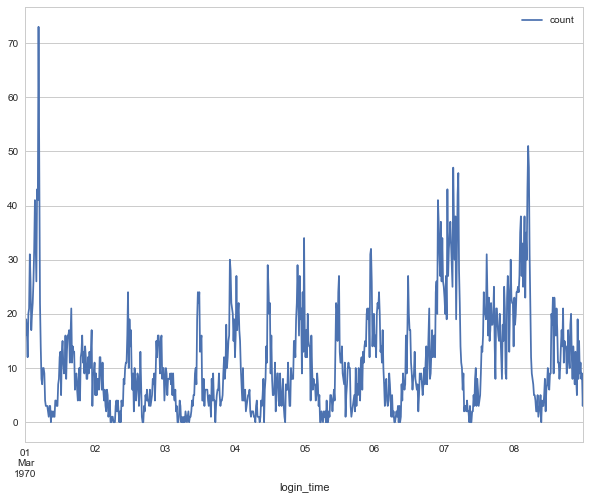

In [30]:
agg_df['1970-03-01':'1970-03-08'].plot()

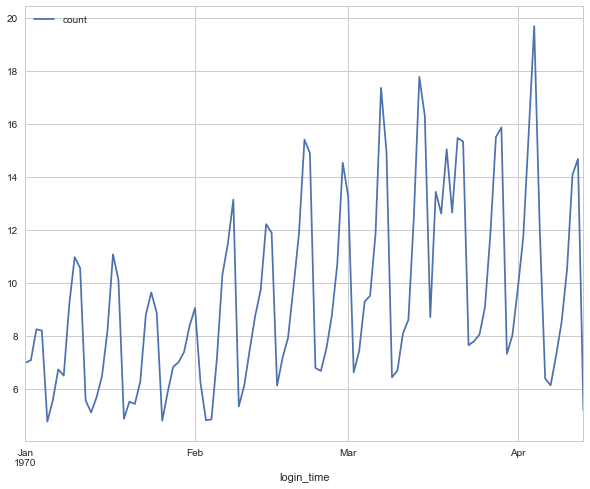

In [28]:
agg_df.resample("D").mean().plot()

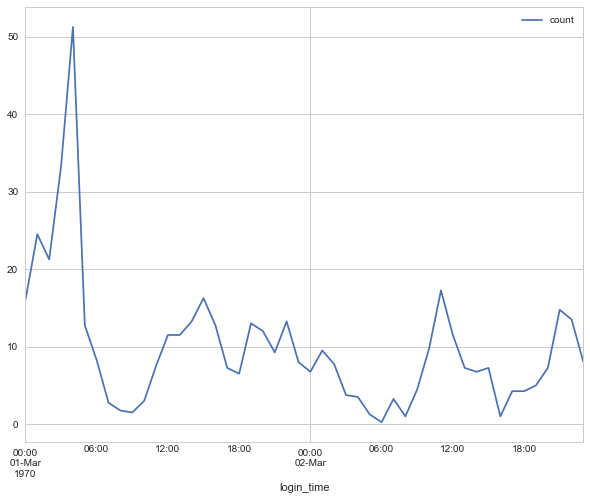

In [33]:
agg_df['1970-03-01':'1970-03-02'].resample("H").mean().plot()

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two way
toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

<b>I would divide all the drivers from both citites into two random groups: A and B with a 
fairly close distribution from both cities. Group A would receive the toll reimbursements 
and Group B would not. After one month, I would  compare the total time of Group A's trips 
starting or ending in their non-native city with Group B's total. Given the objective of 
the experiment, if the premises are accurate, there shoud be a (statistically) significant 
increase.</b>

## Part 3 ‑ Predictive modeling
Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its longterm
rider retention (again, a few sentences will suffice).

### Part 3 - Step 1:
1. Use online app to convert the Json file to a csv file.
2. In Excel, remove "'" in "King's Landing"
3. Next read the csv file into Weka and convert into it's native data type, .arff
4. Replace missing phone type to "unknown" and missing ratings to their means.
5. add new attribute active, set to nominal 1 if total time (final trip - sign-up > 4 months (1.0 x 10^10 msecs)
6. remove sign-up and last trip dates

As shown in the following histogram, using the 4 month window ~47% were active.

![attributes](active.png)

### Part 3 - Step 2:
1. Used a C5 decision tree due to it's clarity of rules making it easy to understand and explain

The tree and model performance result are shown below:

![Ult Tree](ultTree.png)

![ult results](results.png)

### Part 3 - step 3:

The tree-based, predictive model was about 73% accurate.

The largest percentage of active users have a driver's rating between 4 and 4.9 and ride on both weekdays and weekends.

An average rating by the driver of 5 is not a positive indication of being active.

King's Landing is much more active than the other two cities.

Being an "Ultimate Black user" does not have a significant positive effect.

I would make the following recommendations to management to increase active users:
1. Introduce marketing promotions in both Astapor and Winterfell.
2. Introduce a weekend discount for weekday riders and vice versa.
3. Consider revamping the Ultimate-Black user program to increase it's effect.
4. Issue instructions on how drivers can more accurately generate their ratings.